In [1]:
# basic setup
# data from kaggle, "https://www.kaggle.com/competitions/digit-recognizer/data?select=test.csv"
%matplotlib inline

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

mnist_dataset = pd.read_csv("./datasets/mnist/train.csv")
mnist_dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
mnist_dataset.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

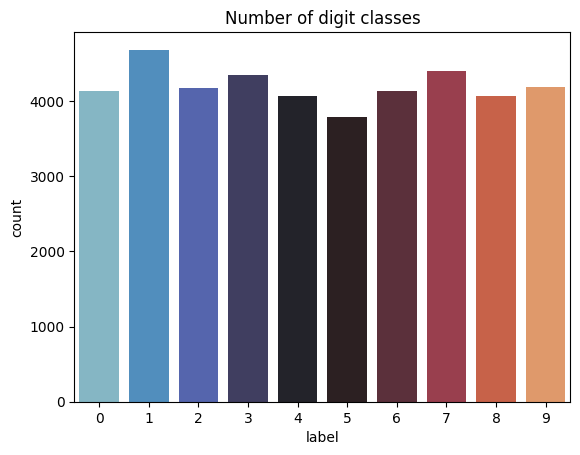

In [3]:
order = list(np.sort(mnist_dataset['label'].unique()))

plt.plot(figure = (16,10))
graph = sns.countplot(x=mnist_dataset["label"], palette = 'icefire')
plt.title('Number of digit classes')

mnist_dataset.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

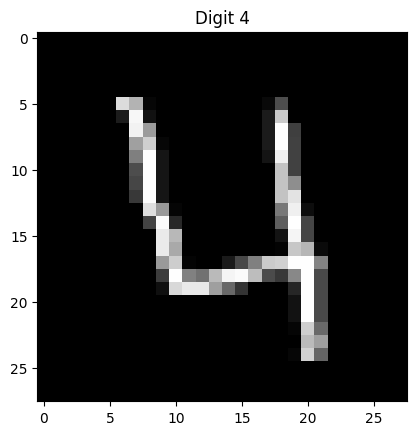

In [4]:
# sample digit number visualized from numpy using "matplotlib.pyplot"
four = mnist_dataset.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)

plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [5]:
# average feature values
round(mnist_dataset.drop('label', axis=1).mean(), 2)

# Separating the X and Y variable
y = mnist_dataset['label']

# Dropping the variable 'label' from X variable 
X = mnist_dataset.drop(columns = 'label')

# Printing the size of data 
mnist_dataset.shape

(42000, 785)

In [6]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [14]:
svm_algor = SVC()
svm_algor.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [8]:
from sklearn import metrics

# 1. accuracy score #
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy: 0.9348412698412698


In [10]:
from sklearn.metrics import classification_report

# 2. classification report #
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1188
           1       0.96      0.98      0.97      1413
           2       0.93      0.93      0.93      1260
           3       0.91      0.93      0.92      1331
           4       0.95      0.93      0.94      1218
           5       0.95      0.91      0.93      1149
           6       0.95      0.95      0.95      1219
           7       0.86      0.94      0.90      1330
           8       0.95      0.90      0.92      1217
           9       0.94      0.89      0.91      1275

    accuracy                           0.93     12600
   macro avg       0.94      0.93      0.93     12600
weighted avg       0.94      0.93      0.93     12600



In [11]:
# 3. confusion matrix #
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion_matrix

array([[1156,    0,    5,    1,    0,    2,   12,    6,    5,    1],
       [   0, 1389,    4,    3,    4,    0,    2,    6,    5,    0],
       [   2,    4, 1170,   19,    5,    0,    9,   35,   15,    1],
       [   1,    4,   19, 1237,    0,   20,    2,   32,   13,    3],
       [   0,    4,   25,    0, 1133,    0,    9,   17,    3,   27],
       [   1,    9,    5,   42,    3, 1047,   17,   11,    8,    6],
       [  13,    2,    5,    0,    2,   15, 1156,   24,    2,    0],
       [   3,   10,    9,    3,   15,    0,    0, 1256,    1,   33],
       [   5,   19,   14,   25,    7,   21,    8,   15, 1095,    8],
       [   4,    4,    6,   30,   23,    2,    1,   61,    4, 1140]])

<AxesSubplot: >

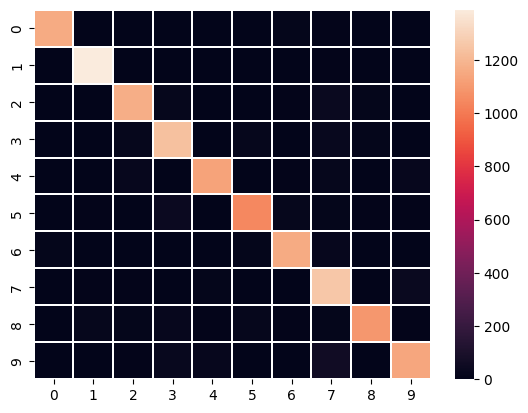

In [12]:
# confusion matrix visualiztion
sns.heatmap(confusion_matrix, linewidths = 0.01)